In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
customer = pd.read_json("dim_customer.json")

customer

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [26]:
invoice = pd.read_csv("fct_invoice.csv")

invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


## Easy 1. How many unique customers are in the dataset?

In [27]:
unique_customers=str(len(invoice.customer_id.unique()))

print("There are "+unique_customers+" unique customers in the dataset.")

There are 5191 unique customers in the dataset.


## Easy 2. What are the different categories of products available? How many unique categories are there?

In [28]:
category=str(invoice.category.unique())
no_category=str(len(invoice.category.unique()))

print("There are "+category+" categories of products available.")
print(" ")
print("There are "+no_category+" unique categories.")

There are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] categories of products available.
 
There are 8 unique categories.


## Easy 3. Which payment method is the most popular? How many times was it used?

In [29]:
p_method=(invoice["payment_method"].value_counts())

p_method.head(1)

Cash    44447
Name: payment_method, dtype: int64

## Medium 1. Which are the three most popular categories by total sales

In [30]:
invoice["total_sales"]=invoice["price"]*invoice["quantity"]

sales = invoice.groupby("category").sum().sort_values("total_sales",ascending=False)

sales.head(3)["total_sales"]

/var/folders/gy/5tjrqr2x5y37srnyw8495t7w0000gn/T/ipykernel_1411/936286798.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales = invoice.groupby("category").sum().sort_values("total_sales",ascending=False)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

## Medium 2. What are the total sales attributed over the age of 45?

In [31]:
new_invoice=invoice.rename(columns={"customer_id":"id"})

merged=pd.merge(customer, new_invoice, on="id")

merged

,age,first_name,gender,id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon,5401.53
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon,600.17
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM,162.64
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul,242.40
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park,322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul,1016.50
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity,40.66
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM,162.64
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity,7502.00


In [32]:
over_45=merged.loc[merged["age"]>45]

over_45["total_sales"].sum()

82039768.14999999

In [33]:
merged

,age,first_name,gender,id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon,5401.53
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon,600.17
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM,162.64
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul,242.40
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park,322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul,1016.50
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity,40.66
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM,162.64
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity,7502.00


## Medium 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [34]:
merged["invoice_date"] = pd.to_datetime(merged["invoice_date"])

merged["invoice_month"] = merged["invoice_date"].dt.month
merged["invoice_year"] = merged["invoice_date"].dt.year

merged

/var/folders/gy/5tjrqr2x5y37srnyw8495t7w0000gn/T/ipykernel_1411/1504146067.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged["invoice_date"] = pd.to_datetime(merged["invoice_date"])


,age,first_name,gender,id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,invoice_month,invoice_year
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,2021-05-28,Kanyon,5401.53,5,2021
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,2021-07-04,Kanyon,600.17,7,2021
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,2021-02-13,Metropol AVM,162.64,2,2021
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,2023-01-21,Mall of Istanbul,242.40,1,2023
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,2022-01-08,Istinye Park,322.56,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,2021-04-07,Mall of Istanbul,1016.50,4,2021
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,2022-09-07,Metrocity,40.66,9,2022
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,2021-07-04,Cevahir AVM,162.64,7,2021
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,2022-10-20,Metrocity,7502.00,10,2022


In [36]:
merged["invoice_count"] = 1

dates_and_count = merged.groupby(["invoice_year","invoice_month"]).sum()
dates_and_count

/var/folders/gy/5tjrqr2x5y37srnyw8495t7w0000gn/T/ipykernel_1411/4224526500.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dates_and_count = merged.groupby(["invoice_year","invoice_month"]).sum()


age       id  quantity       price  \
invoice_year invoice_month                                            
2021         1              109224.0  3716045     11261  2576821.60   
             2              102655.0  3317953     10234  2374882.12   
             3              117047.0  3875452     11708  2755492.75   
             4              109743.0  3766955     11340  2647497.76   
             5              113894.0  3878801     11654  2678394.69   
             6              110868.0  3816858     11431  2566936.55   
             7              120433.0  4006947     11980  2767499.65   
             8              110583.0  3853184     11308  2584867.89   
             9              106987.0  3638512     10756  2477456.71   
             10             112549.0  3846814     11598  2738863.73   
             11             112259.0  3714216     11129  2499835.01   
             12             115077.0  3899713     11697  2647756.17   
2022         1              109858.0  3939845     11476  2700665.69   
             2              101872.0  3419391     10214  2379247.27   
             3              116290.0  3782071     11812  2687567.35   
             4              108244.0  3756109     11279  2589770.93   
             5              114146.0  3904127     11568  2679964.45   
             6              112439.0  3774487     11370  2635905.48   
             7              111679.0  3848976     11628  2649167.06   
             8              111476.0  3914286     11537  2576463.43   
             9              111437.0  3743404     11445  2596237.64   
             10             117741.0  3924445     11839  2727594.65   
             11             112827.0  3785450     11276  2478523.81   
             12             111553.0  3757962     11703  2671718.42   
2023         1               81356.0  2705622      8160  1796920.94   
             2               71940.0  2539903      7497  1775770.11   
             3               11126.0   354499      1124   246276.50   
             4               11766.0   454815      1200   276995.69   
             5               11987.0   382577      1157   257420.54   
             6               11714.0   388571      1181   301680.27   
             7               11783.0   374275      1106   256520.43   
             8               10679.0   405879      1098   252117.95   
             9                8335.0   260232       791   194996.06   
             10               6792.0   253727       730   207778.80   
             11               6772.0   214670       668   142045.14   
             12               7303.0   204824       757   153712.67   

                            total_sales  invoice_count  
invoice_year invoice_month                              
2021         1               9311287.10           3771  
             2               8814790.84           3402  
             3              10059349.81           3918  
             4               9730141.58           3770  
             5               9767474.25           3864  
             6               9485372.57           3761  
             7              10142596.01           4014  
             8               9490554.67           3750  
             9               8913202.33           3619  
             10             10159800.73           3873  
             11              9060694.39           3744  
             12              9625306.31           3896  
2022         1               9917602.79           3842  
             2               8594168.17           3445  
             3               9862725.13           3927  
             4               9616818.11           3738  
             5               9902187.05           3852  
             6               9727219.72           3788  
             7               9662190.26           3870  
             8               9408352.51           3881  
             9               9603433.46           3752  
             10        

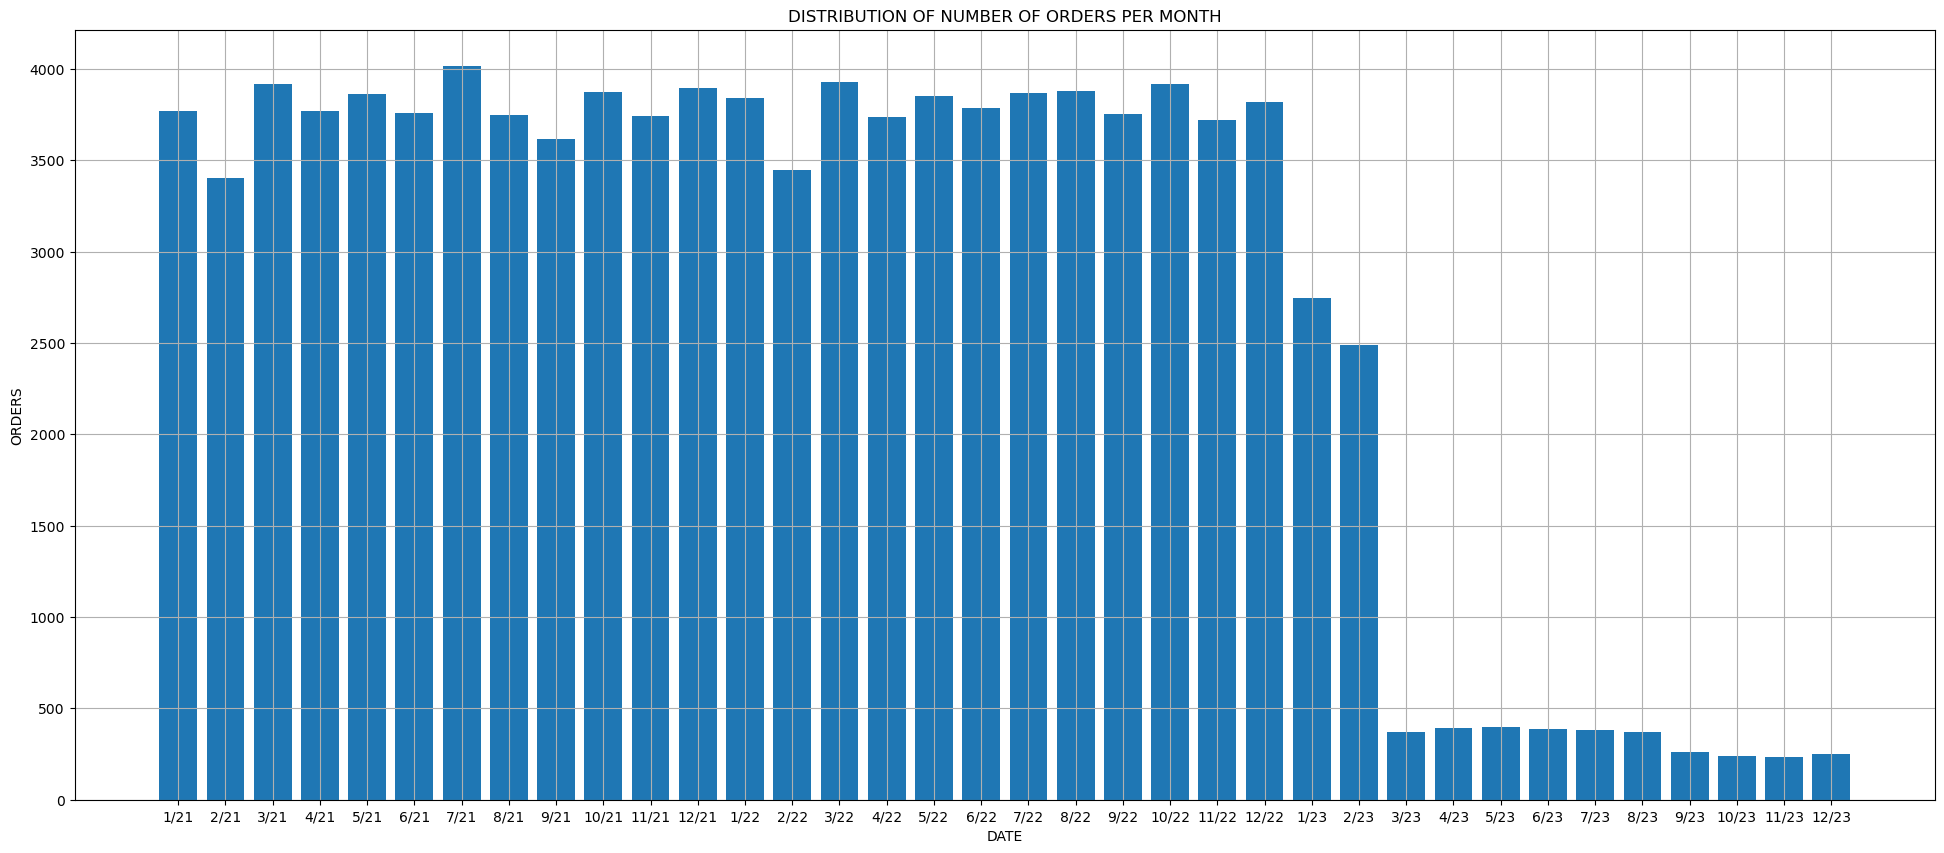

In [37]:
categories = []
for i in range(21, 23+1):
    for j in range(1, 12+1):
        output = str(j) + "/" + str(i)
        categories.append(output)

values = []
for k in dates_and_count["invoice_count"]:
    values.append(k)
    
plt.figure(figsize = (24,10))
plt.bar(categories, values)
plt.xlabel("DATE")
plt.ylabel("ORDERS")
plt.title("DISTRIBUTION OF NUMBER OF ORDERS PER MONTH")
plt.grid(True)
plt.show()

Based on the graph, the number of orders were high with the number of orders from 1/21 to 12/22 having 3500+ orders. It started decreasing by 1/23 and consistently numbered below 500 orders from 3/23 to 12/23.

## Hard 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [40]:
#Make the age range

list_of_agerange = []

for age in merged["age"]:
    if age >= 10 and age <= 19:
        list_of_agerange.append("10-19")
    elif age >= 20 and age <= 29:
        list_of_agerange.append("20-29")
    elif age >= 30 and age <= 39:
        list_of_agerange.append("30-39")
    elif age >= 40 and age <= 49:
        list_of_agerange.append("40-49")
    elif age >= 50 and age <= 59:
        list_of_agerange.append("50-59")
    elif age >= 60 and age <= 69:
        list_of_agerange.append("60-69")
    elif age >= 70 and age <= 79:
        list_of_agerange.append("70-79")
    elif age >= 80 and age <= 89:
        list_of_agerange.append("80-89")
    else:
        list_of_agerange.append("NO AGE")
    


merged["age_range"] = list_of_agerange
merged

,age,first_name,gender,id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,invoice_month,invoice_year,invoice_count,age_range
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,2021-05-28,Kanyon,5401.53,5,2021,1,40-49
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,2021-07-04,Kanyon,600.17,7,2021,1,40-49
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,2021-02-13,Metropol AVM,162.64,2,2021,1,40-49
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,2023-01-21,Mall of Istanbul,242.40,1,2023,1,40-49
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,2022-01-08,Istinye Park,322.56,1,2022,1,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,2021-04-07,Mall of Istanbul,1016.50,4,2021,1,NO AGE
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,2022-09-07,Metrocity,40.66,9,2022,1,NO AGE
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,2021-07-04,Cevahir AVM,162.64,7,2021,1,80-89
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,2022-10-20,Metrocity,7502.00,10,2022,1,NO AGE


In [43]:
#Filter the relevant data

pivot_table_data = merged[["age_range", "total_sales", "category"]]
pivot_table_data

,age_range,total_sales,category
0,40-49,5401.53,Shoes
1,40-49,600.17,Shoes
2,40-49,162.64,Cosmetics
3,40-49,242.40,Books
4,40-49,322.56,Toys
...,...,...,...
99452,NO AGE,1016.50,Cosmetics
99453,NO AGE,40.66,Cosmetics
99454,80-89,162.64,Cosmetics
99455,NO AGE,7502.00,Clothing


In [44]:
#Make pivot table

list_of_category = list(pivot_table_data["category"])
list_of_sales = list(pivot_table_data["total_sales"])
list_of_agerange = list(pivot_table_data["age_range"])


data = {'CATEGORY': list_of_category,
        'AGES': list_of_agerange,
        'SALES': list_of_sales}

df = pd.DataFrame(data)

pivot_table = df.pivot_table(values='SALES', index='CATEGORY', columns='AGES', aggfunc='sum')

pivot_table

AGES,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,NO AGE
CATEGORY,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
